<a href="https://colab.research.google.com/github/shubhi1488/MachineLearning_Models/blob/main/HousePricePredictionUsingXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Corrected import statement
import sklearn .datasets#through this we will get boston dataset
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
import pandas as pd
import numpy as np

#Inporting the boston house price data
# boston_dataset=sklearn.datasets.load_boston() # Original line, commented out

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_dataset = pd.DataFrame(data, columns=[f"feature_{i}" for i in range(data.shape[1])])
boston_dataset['target'] = target

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-561064372.py:8: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [ ]:
boston_dataset.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(boston_dataset)

     feature_0  feature_1  feature_2  ...  feature_11  feature_12  target
0      0.00632       18.0       2.31  ...      396.90        4.98    24.0
1      0.02731        0.0       7.07  ...      396.90        9.14    21.6
2      0.02729        0.0       7.07  ...      392.83        4.03    34.7
3      0.03237        0.0       2.18  ...      394.63        2.94    33.4
4      0.06905        0.0       2.18  ...      396.90        5.33    36.2
..         ...        ...        ...  ...         ...         ...     ...
501    0.06263        0.0      11.93  ...      391.99        9.67    22.4
502    0.04527        0.0      11.93  ...      396.90        9.08    20.6
503    0.06076        0.0      11.93  ...      396.90        5.64    23.9
504    0.10959        0.0      11.93  ...      393.45        6.48    22.0
505    0.04741        0.0      11.93  ...      396.90        7.88    11.9

[506 rows x 14 columns]


In [ ]:
#loading the dataset to a pandas dataframe (excluding the target column for features)
house_price_dataframe = boston_dataset.drop('target', axis=1)

In [ ]:
house_price_dataframe.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#add the target column to the dataframe
house_price_dataframe['price']=boston_dataset['target']

In [ ]:
house_price_dataframe.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#checking number of rows and columns
house_price_dataframe.shape

(506, 14)

In [ ]:
#check for missing values
house_price_dataframe.isnull().sum()

,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0


In [ ]:
#statistical methods of the data
house_price_dataframe.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset.

There are two types of correlation:positive and negative correlation.

In [ ]:
correlation=house_price_dataframe.corr()#find the correlation between all the values.

cbar-color bar which is at the side of the matrix.
square-
fmt-how many floor values we want in this we have 1 value after decimal
annot-feature_0 are the annotations.

<Axes: >

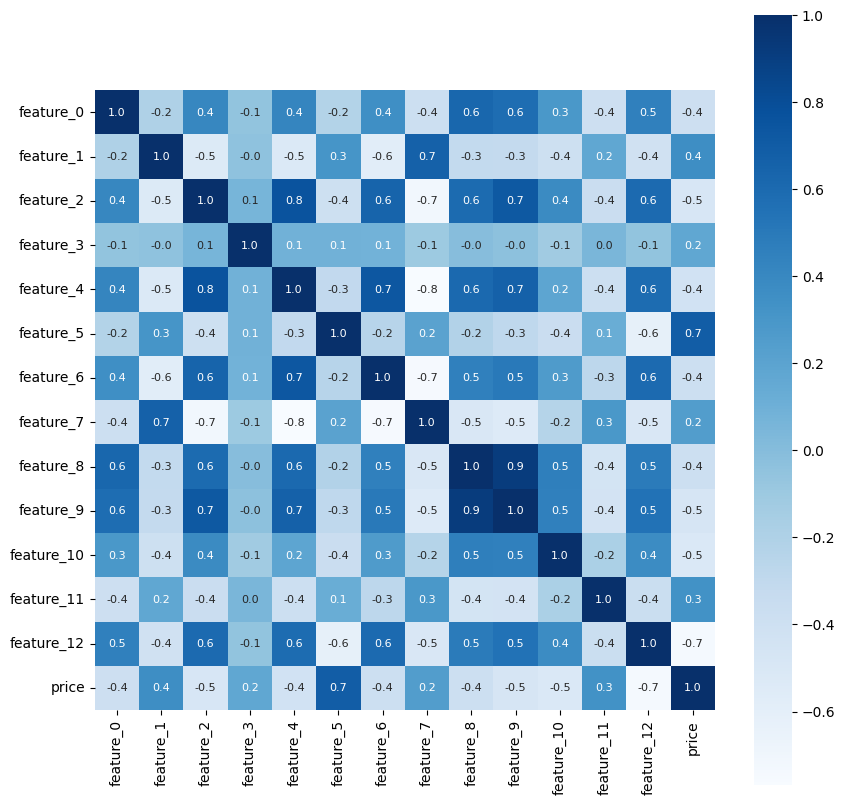

In [ ]:
#constructing heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#train and test split
X=house_price_dataframe.drop(['price'],axis=1)
Y=house_price_dataframe['price']

In [ ]:
print(X,Y)

     feature_0  feature_1  feature_2  ...  feature_10  feature_11  feature_12
0      0.00632       18.0       2.31  ...        15.3      396.90        4.98
1      0.02731        0.0       7.07  ...        17.8      396.90        9.14
2      0.02729        0.0       7.07  ...        17.8      392.83        4.03
3      0.03237        0.0       2.18  ...        18.7      394.63        2.94
4      0.06905        0.0       2.18  ...        18.7      396.90        5.33
..         ...        ...        ...  ...         ...         ...         ...
501    0.06263        0.0      11.93  ...        21.0      391.99        9.67
502    0.04527        0.0      11.93  ...        21.0      396.90        9.08
503    0.06076        0.0      11.93  ...        21.0      396.90        5.64
504    0.10959        0.0      11.93  ...        21.0      393.45        6.48
505    0.04741        0.0      11.93  ...        21.0      396.90        7.88

[506 rows x 13 columns] 0      24.0
1      21.6
2      34.7
3  

In [ ]:
#splitting the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model training:XGBoost

In [ ]:
#loading the model
model=XGBRegressor()

In [ ]:
#we need to fit the train data to the model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Predictions on the training data.

In [ ]:
#accuracy for prediction on training data.
training_data_prediction=model.predict(X_train)


In [ ]:
print(training_data_prediction)

[25.287899  23.304115   7.203543  21.18787   11.712369  27.001377
 29.601633  26.501963  43.502502  23.609913  10.997985  33.40193
 35.998486  36.395298  19.011835  20.196331  34.899765  49.998886
 19.298422  14.8881445 26.610622  19.905317  24.798319  21.198807
 23.907646  20.584316  23.090736  27.999428  19.994778  23.093884
 25.001348   9.686624  23.905449  36.100372  13.402416  12.723068
 39.79885   10.400233  20.598919  17.77934   19.504488  23.694613
 28.506124  24.299711  23.786673  19.092104  28.388767  20.490433
 33.81244   14.507689  20.388994  16.001871  13.30335   30.790573
 27.492449  24.405096  24.39801   25.141434  43.815685  21.899052
 26.19648   14.208478  20.789291  20.100916  23.098286  13.083362
 16.18796   24.807959  20.201899  22.47833   14.804074  28.702394
 20.099424  23.400444  31.995035  19.11702   49.986347  20.898264
 21.688086  22.005064  17.201548  30.302023  12.282589  21.394003
 20.502174  35.20127   19.59359   22.004604  21.695543  14.104271
 21.090494 

In [ ]:
#R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

In [32]:
#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

In [33]:
print("R squared error:",score_1)
print("Mean squared error:",score_2)

R squared error: 0.9999985384297829
Mean squared error: 0.007549762017656112


Visualizing the actual prices and predicted prices.

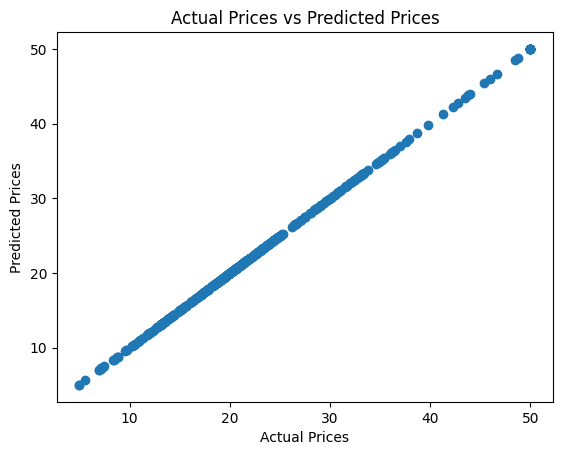

In [38]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [34]:
test_data_predictions=model.predict(X_test)


In [35]:
print(test_data_predictions)

[28.336819  26.597584  19.792858  20.611383  18.545818  19.453184
 26.648758  18.080725  22.416357  23.06778   32.065525  29.941965
 20.547226  19.396442  20.093483  22.52369   13.446332  41.4352
 22.348145  13.87149   18.950987  17.918982  22.873806  23.541578
 25.385286   8.704066  14.194177  19.413843  46.33574   11.259404
 27.514545  18.76786   48.342777  17.241179  24.26537   21.497921
 15.512403  32.143536  15.069678  20.11839   25.356554  22.04568
 25.675129  17.242792  15.122623  10.560996  48.17597   12.85539
 22.573072  18.335344  21.861294  21.35094   24.693954  20.376339
  7.629585  23.325792  12.785408  24.13955   18.06973   39.841026
 16.648785  24.738739  13.902513  12.803886  17.623657  36.956356
 39.656597  22.931211  21.100302  20.73357   24.322184   7.7939644
 17.669674  20.8905    19.738497  21.708748  42.157803  24.612902
 26.520536  30.90382   16.709614  19.543774  35.40963   13.559751
 23.027912  23.693682  13.70098   23.605621  21.086628  16.265974
 26.904982  4

In [36]:
score_3=metrics.r2_score(Y_test,test_data_predictions)
score_4=metrics.mean_absolute_error(Y_test,test_data_predictions)

In [37]:
print(score_3)
print(score_4)

0.9027718655671774
2.2952071479722562
